In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_csv('train.csv')

In [4]:
pd.set_option('display.max_columns',None)

In [3]:
train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [5]:
train_df.isna().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [6]:
df1=train_df.copy()

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [8]:
numerical_cols=list(df1.drop(columns=['id']).select_dtypes(include='number'))
categroical_cols=list(df1.drop(columns=['id']).select_dtypes('object'))
print(numerical_cols)
print(categroical_cols)

['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
['Stage_fear', 'Drained_after_socializing', 'Personality']


In [9]:

px.box(df1,y='Time_spent_Alone',color='Personality')

In [10]:

px.box(df1,y='Social_event_attendance',color='Personality')

In [127]:
px.box(df1,y='Going_outside',color='Personality')

In [126]:
px.box(df1,y='Friends_circle_size',color='Personality')

In [125]:
px.box(df1,y='Post_frequency',color='Personality')

In [14]:
px.bar(df1.groupby(['Stage_fear','Personality'])['id'].count().reset_index().rename(columns={'id':'count'}),y='count',x='Stage_fear',color='Personality')

In [15]:
px.bar(df1.groupby(['Drained_after_socializing','Personality']).size().reset_index().rename(columns={0:'count'}),y='count',x='Drained_after_socializing',color='Personality')

In [124]:
df1.head(1)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert


In [16]:
df1.isna().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [17]:
invt_df=df1.loc[df1['Personality']=='Introvert']
exvt_df=df1.loc[df1['Personality']=='Extrovert']

In [62]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=3)

In [63]:
invt_df[numerical_cols]=knn.fit_transform(invt_df[numerical_cols])

C:\Users\sair4\AppData\Local\Temp\ipykernel_1900\1598696005.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
invt_df[numerical_cols].isna().sum()[invt_df[numerical_cols].isna().sum()!=0]

Series([], dtype: int64)

In [65]:
exvt_df[numerical_cols]=knn.fit_transform(exvt_df[numerical_cols])

C:\Users\sair4\AppData\Local\Temp\ipykernel_1900\3628689071.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
exvt_df[numerical_cols].isna().sum()[exvt_df[numerical_cols].isna().sum()!=0]

Series([], dtype: int64)

In [67]:
from sklearn.impute import SimpleImputer
si_mode=SimpleImputer(strategy='most_frequent')

In [68]:
print(categroical_cols)

['Stage_fear', 'Drained_after_socializing', 'Personality']


In [69]:
tbcc=['Stage_fear','Drained_after_socializing']

In [70]:
exvt_df[tbcc]=si_mode.fit_transform(exvt_df[tbcc])
invt_df[tbcc]=si_mode.fit_transform(invt_df[tbcc])

C:\Users\sair4\AppData\Local\Temp\ipykernel_1900\2423016364.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sair4\AppData\Local\Temp\ipykernel_1900\2423016364.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
exvt_df.isna().sum()[exvt_df.isna().sum()!=0]

Series([], dtype: int64)

In [72]:
invt_df.isna().sum()[invt_df.isna().sum()!=0]

Series([], dtype: int64)

In [73]:
combinded_df=pd.concat([invt_df,exvt_df])
combinded_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2,2,6.0,Yes,1.0,0.0,Yes,3.0,0.0,Introvert
8,8,4.0,Yes,2.0,1.0,Yes,0.0,2.0,Introvert
17,17,5.0,Yes,0.0,4.0,Yes,2.0,0.0,Introvert
21,21,6.0,Yes,3.0,2.0,Yes,1.0,3.0,Introvert
22,22,4.0,Yes,0.0,1.0,Yes,2.0,0.0,Introvert


In [74]:
fin_df=combinded_df.sort_values('id',ascending=True)

In [75]:
fin_df.isna().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [77]:
for i in range(len(categroical_cols)):
    fin_df[categroical_cols[i]]=le.fit_transform(df1[categroical_cols[i]])

In [78]:
train_df[categroical_cols].head(1)

,Stage_fear,Drained_after_socializing,Personality
0,No,No,Extrovert


In [79]:
fin_df[categroical_cols].head(1)

,Stage_fear,Drained_after_socializing,Personality
0,0,0,0


In [123]:
fin_df.to_csv('final.csv')

In [80]:
input_cols=list(fin_df.drop(columns='Personality'))
target_col='Personality'
print(input_cols)

['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']


In [100]:
x=fin_df[input_cols]
y=fin_df[target_col]

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_val_test,y_train,y_val_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_val_test,y_val_test,test_size=0.5,random_state=42)

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=6,max_features=5)
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [118]:
print('validataion_score:',rf.score(x_val,y_val))
print('Test_score:',rf.score(x_test,y_test))

validataion_score: 0.9665347247211227
Test_score: 0.9694134580784455


In [119]:
def check_scr(md):
    rf.fit(x_train,y_train)
    val_error=1-rf.score(x_val,y_val)
    test_error=1-rf.score(x_test,y_test)
    return {'max_depth':md,'validation_error':val_error,'test_error':test_error}

In [120]:
mdl=[]
vel=[]
tel=[]
for i in range(1,21):
    a=check_scr(i)
    mdl.append(a['max_depth'])
    vel.append(a['validation_error'])
    tel.append(a['test_error'])

In [121]:
dic={'MaxDepth':mdl,'TrainingError':tel,'ValidationError':vel}
info_df=pd.DataFrame(dic)
info_df

,MaxDepth,TrainingError,ValidationError
0,1,0.030946,0.033825
1,2,0.030946,0.033465
2,3,0.030946,0.034185
3,4,0.030946,0.033465
4,5,0.030946,0.033825
5,6,0.030946,0.033465
6,7,0.030587,0.033465
7,8,0.030587,0.034185
8,9,0.030946,0.033825
9,10,0.030227,0.034185


<Axes: xlabel='MaxDepth', ylabel='TrainingError'>

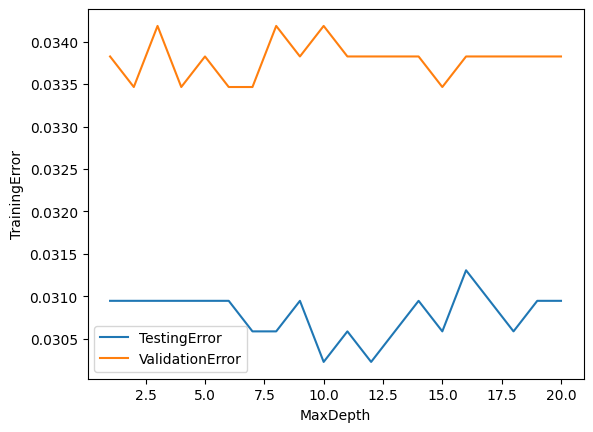

In [122]:
sns.lineplot(info_df,x='MaxDepth',y='TrainingError',label='TestingError')
sns.lineplot(info_df,x='MaxDepth',y='ValidationError',label='ValidationError')